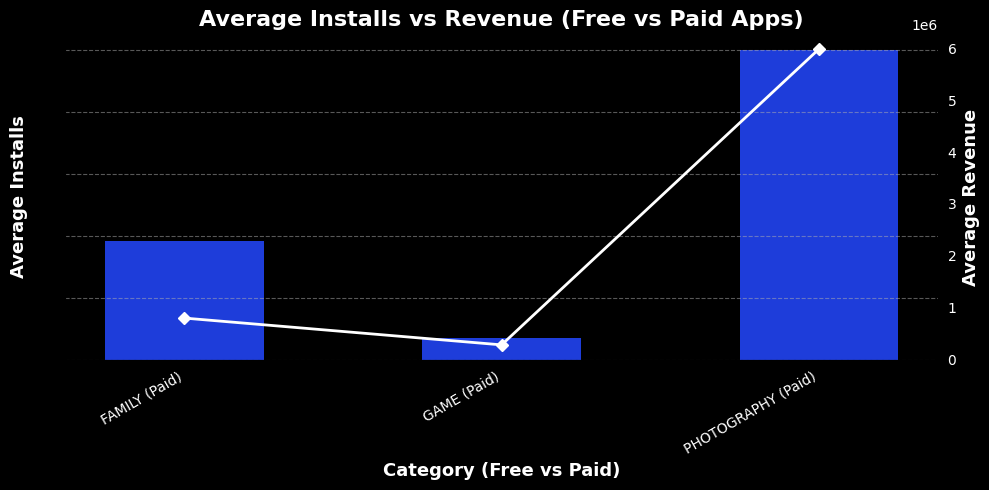

In [ ]:

# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
#data loading
FILE_PATH = "Play Store Data.csv"
apps_df = pd.read_csv(FILE_PATH)
#data cleaning
apps_df = apps_df.dropna(subset=['Rating'])
apps_df = apps_df[apps_df['Rating'] <= 5]

apps_df['Installs'] = (
    apps_df['Installs']
    .str.replace(',', '', regex=False)
    .str.replace('+', '', regex=False)
    .astype(int)
)

apps_df['Price'] = (
    apps_df['Price']
    .str.replace('$', '', regex=False)
    .astype(float)
)


def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        if 'K' in size:
            return float(size.replace('K', '')) / 1024
    return np.nan

apps_df['Size_MB'] = apps_df['Size'].astype(str).apply(convert_size)

# Revenue
apps_df['Revenue'] = apps_df['Price'] * apps_df['Installs']
apps_df['Android Ver'] = (
    apps_df['Android Ver']
    .str.replace('and up', '', regex=False)
    .str.strip()
)
apps_df['Android Ver'] = pd.to_numeric(apps_df['Android Ver'], errors='coerce')

# filtering condition
filtered_df = apps_df[
    (apps_df['Installs'] >= 10000) &
    (apps_df['Revenue'] >= 10000) &
    (apps_df['Android Ver'] > 4.0) &
    (apps_df['Size_MB'] > 15) &
    (apps_df['Content Rating'] == 'Everyone') &
    (apps_df['App'].str.len() <= 30)
]
#catorgeries
top_categories = filtered_df['Category'].value_counts().head(3).index
filtered_df = filtered_df[filtered_df['Category'].isin(top_categories)]

summary = (
    filtered_df
    .groupby(['Category', 'Type'])
    .agg(
        Avg_Install=('Installs', 'mean'),
        Avg_Revenue=('Revenue', 'mean')
    )
    .reset_index()
)

# time setting
IST = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(IST).time()

START_TIME = datetime.strptime("6:00", "%H:%M").time()
END_TIME = datetime.strptime("23:00", "%H:%M").time()

#viaualization
if START_TIME <= current_time <= END_TIME:

    fig, axis1 = plt.subplots(figsize=(10, 5))

    categories = summary['Category'] + " (" + summary['Type'] + ")"

    # Bar: Average Installs
    axis1.bar(
        range(len(categories)),
        summary['Avg_Install'],
        width=0.5,
        color="#1E3DDA"
    )

    axis1.set_ylabel(
        "Average Installs",
        fontsize=13,
        fontweight='bold',
        color='white'
    )
    axis1.set_xlabel(
        "Category (Free vs Paid)",
        fontsize=13,
        fontweight='bold',
        color='white'
    )

    axis1.set_xticks(range(len(categories)))
    axis1.set_xticklabels(
        categories,
        rotation=30,
        ha='right',
        fontsize=10,
        color='white'
    )

    axis1.grid(True, axis='y', linestyle='--', alpha=0.5)

    # Line: Average Revenue
    axis2 = axis1.twinx()
    axis2.plot(
        range(len(categories)),
        summary['Avg_Revenue'],
        color='white',
        marker='D',
        linewidth=2
    )

    axis2.set_ylabel(
        "Average Revenue",
        fontsize=13,
        fontweight='bold',
        color='white'
    )
    axis2.tick_params(axis='y', labelcolor='white')

    # Background Styling
    fig.patch.set_facecolor('black')
    axis1.set_facecolor('black')

    plt.title(
        "Average Installs vs Revenue (Free vs Paid Apps)",
        fontsize=16,
        fontweight='bold',
        color='white'
    )

    plt.tight_layout()
    plt.show()

else:
    print("Do not show the chart (outside allowed time window)")